<a href="https://colab.research.google.com/github/d3yja/PYCST/blob/main/Copy_of_AI_nexus_bpc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The cell below displays the current working directory

In [ ]:
!sudo apt-get install unzip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
# Path to your ZIP file
zip_file_path = '/content/dataset.zip'

# Destination folder for unzipped content
destination_folder = '/content/dataset_unzipped/'  # Change folder name if needed

# Create the destination folder (if it doesn't already exist)
!mkdir -p {destination_folder}

# Unzip the file into the destination folder
!unzip -o {zip_file_path} -d {destination_folder}

print(f"Files have been unzipped to: {destination_folder}")

unzip:  cannot find or open /content/dataset.zip, /content/dataset.zip.zip or /content/dataset.zip.ZIP.
Files have been unzipped to: /content/dataset_unzipped/


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


# Setting up YOLO

In [ ]:
!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.8/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

# Use YOLOv8 to perform object detection on an image

Explanation of parameters:
- task=detect: Specifies the task as object detection.
- mode=predict: Runs the model in prediction mode.
- model=yolov8n.pt: Loads the YOLOv8 nano model (lightweight version).
- conf=0.25: Sets a confidence threshold of 25% for predictions.
- source='...': URL of the image to process.
- save=True: Ensures the result image with detections is saved locally.

In [ ]:
%cd {HOME} # changes current working directory to HOME
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

[Errno 2] No such file or directory: '/content # changes current working directory to HOME'
/content
100% 6.25M/6.25M [00:00<00:00, 108MB/s]
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

100% 104k/104k [00:00<00:00, 63.0MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 80.6ms
Speed: 11.6ms preprocess, 80.6ms inference, 1249.2ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


# Display the detected image output saved in the specified path
- Image(filename='...'): Specifies the path to the image file.
- height=600: Sets the height of the displayed image to 600 pixels.

/content


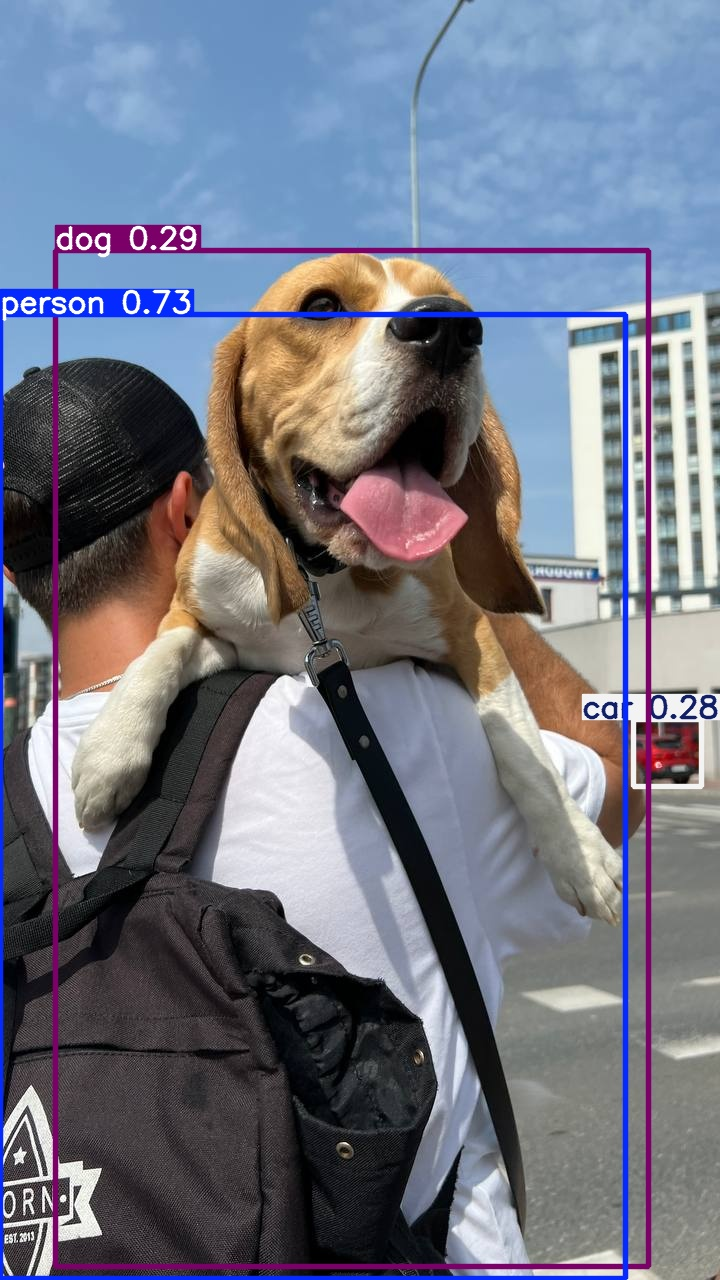

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

# Training on a Custom Dataset

In [ ]:
# !rm -r /content/runs

rm: cannot remove '/content/runs': No such file or directory


In [ ]:
# !cp -r /content/runs /content/datasets/runs

cp: cannot stat '/content/runs': No such file or directory


In [ ]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow==1.1.48 --quiet

/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data=/content/datasets/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 194MB/s]
New https://pypi.org/project/ultralytics/8.3.63 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, 

# Displaying confusion matrix

/content


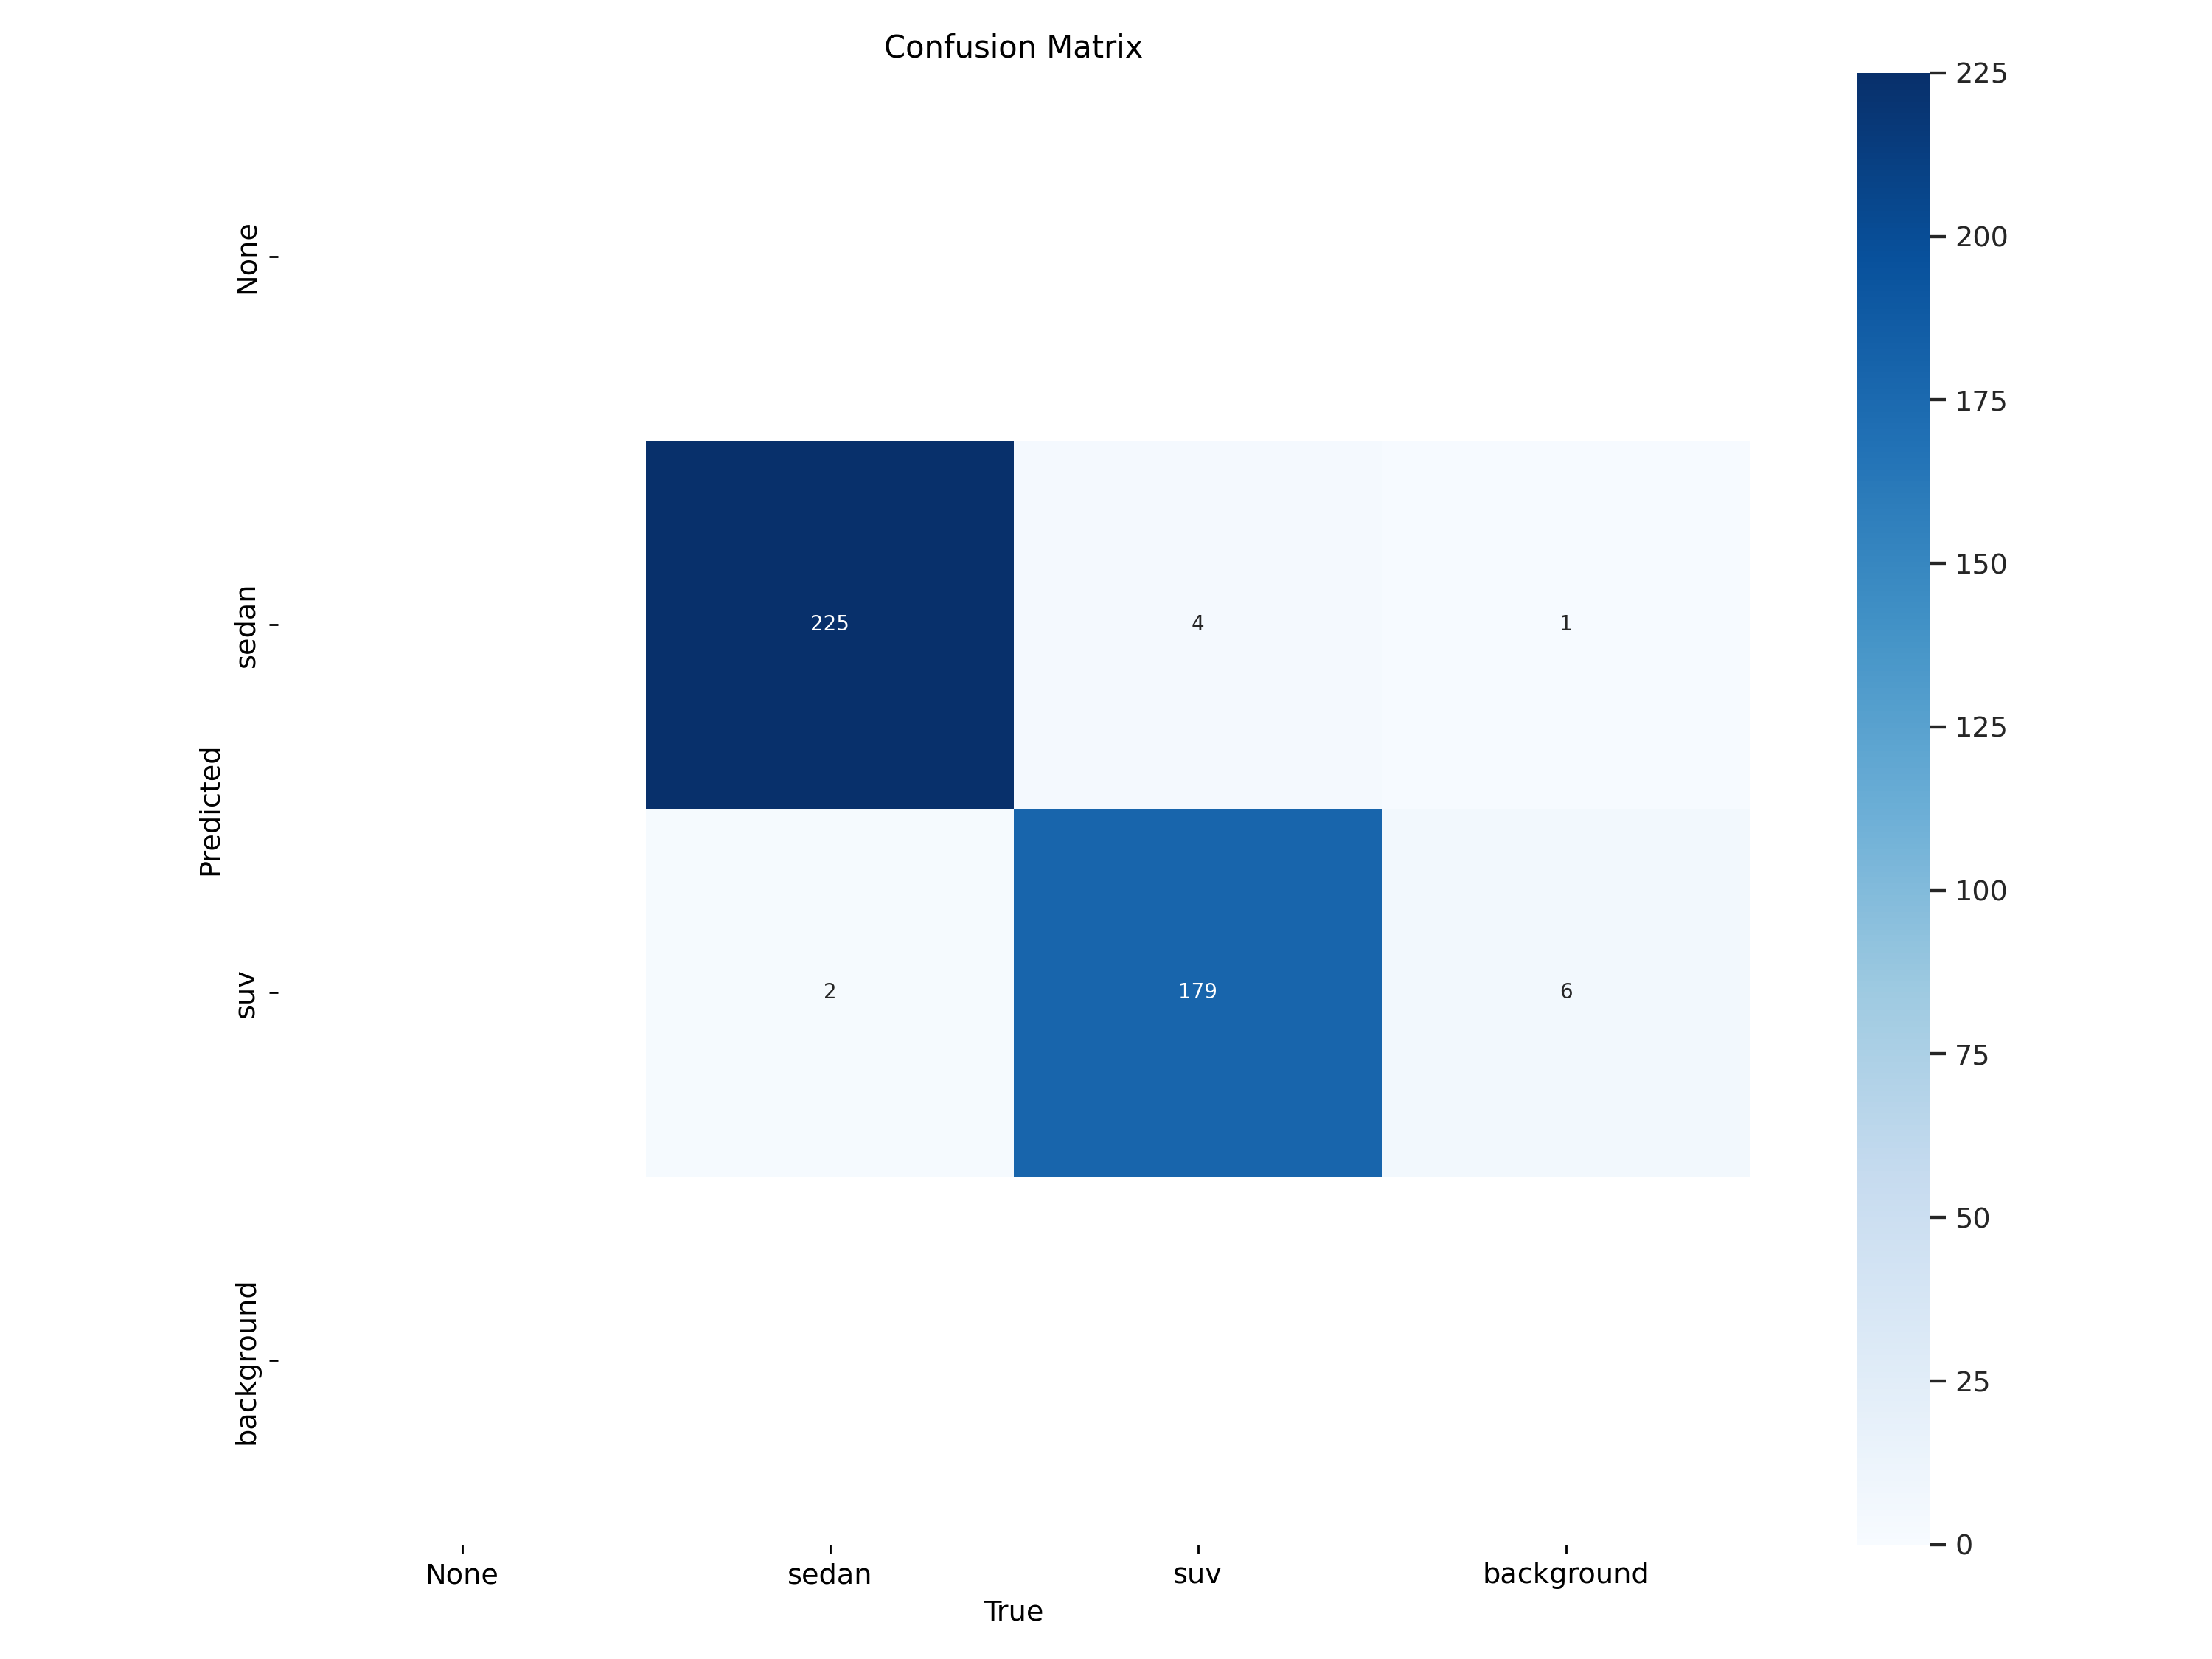

In [ ]:
%cd {HOME}
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

/content


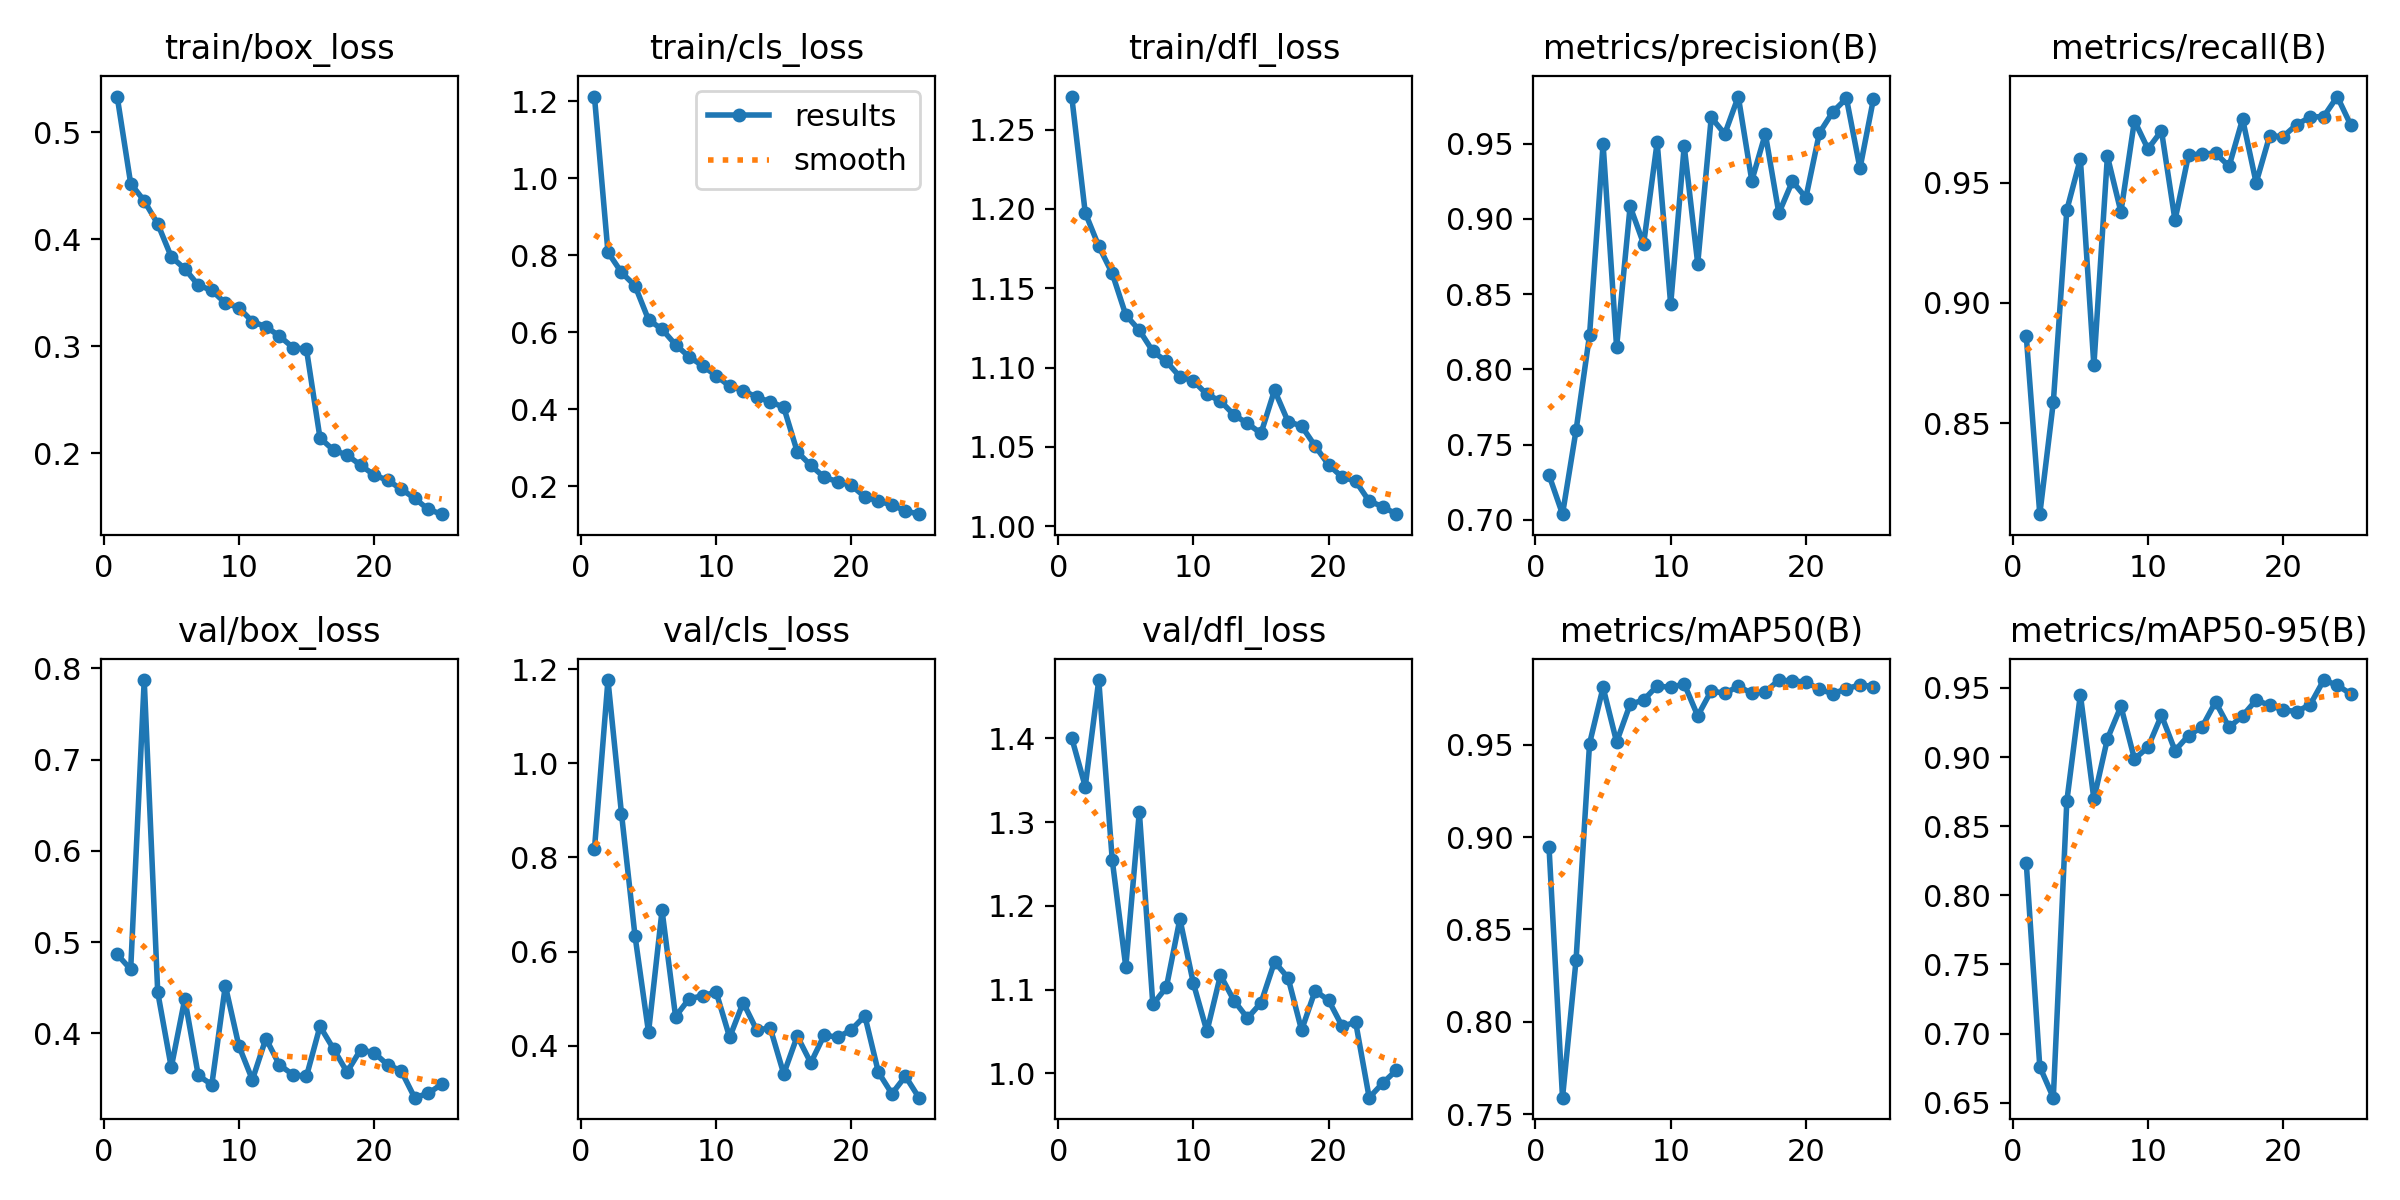

In [ ]:
%cd {HOME}
Image(filename=f'/content/runs/detect/train/results.png', width=600)

/content


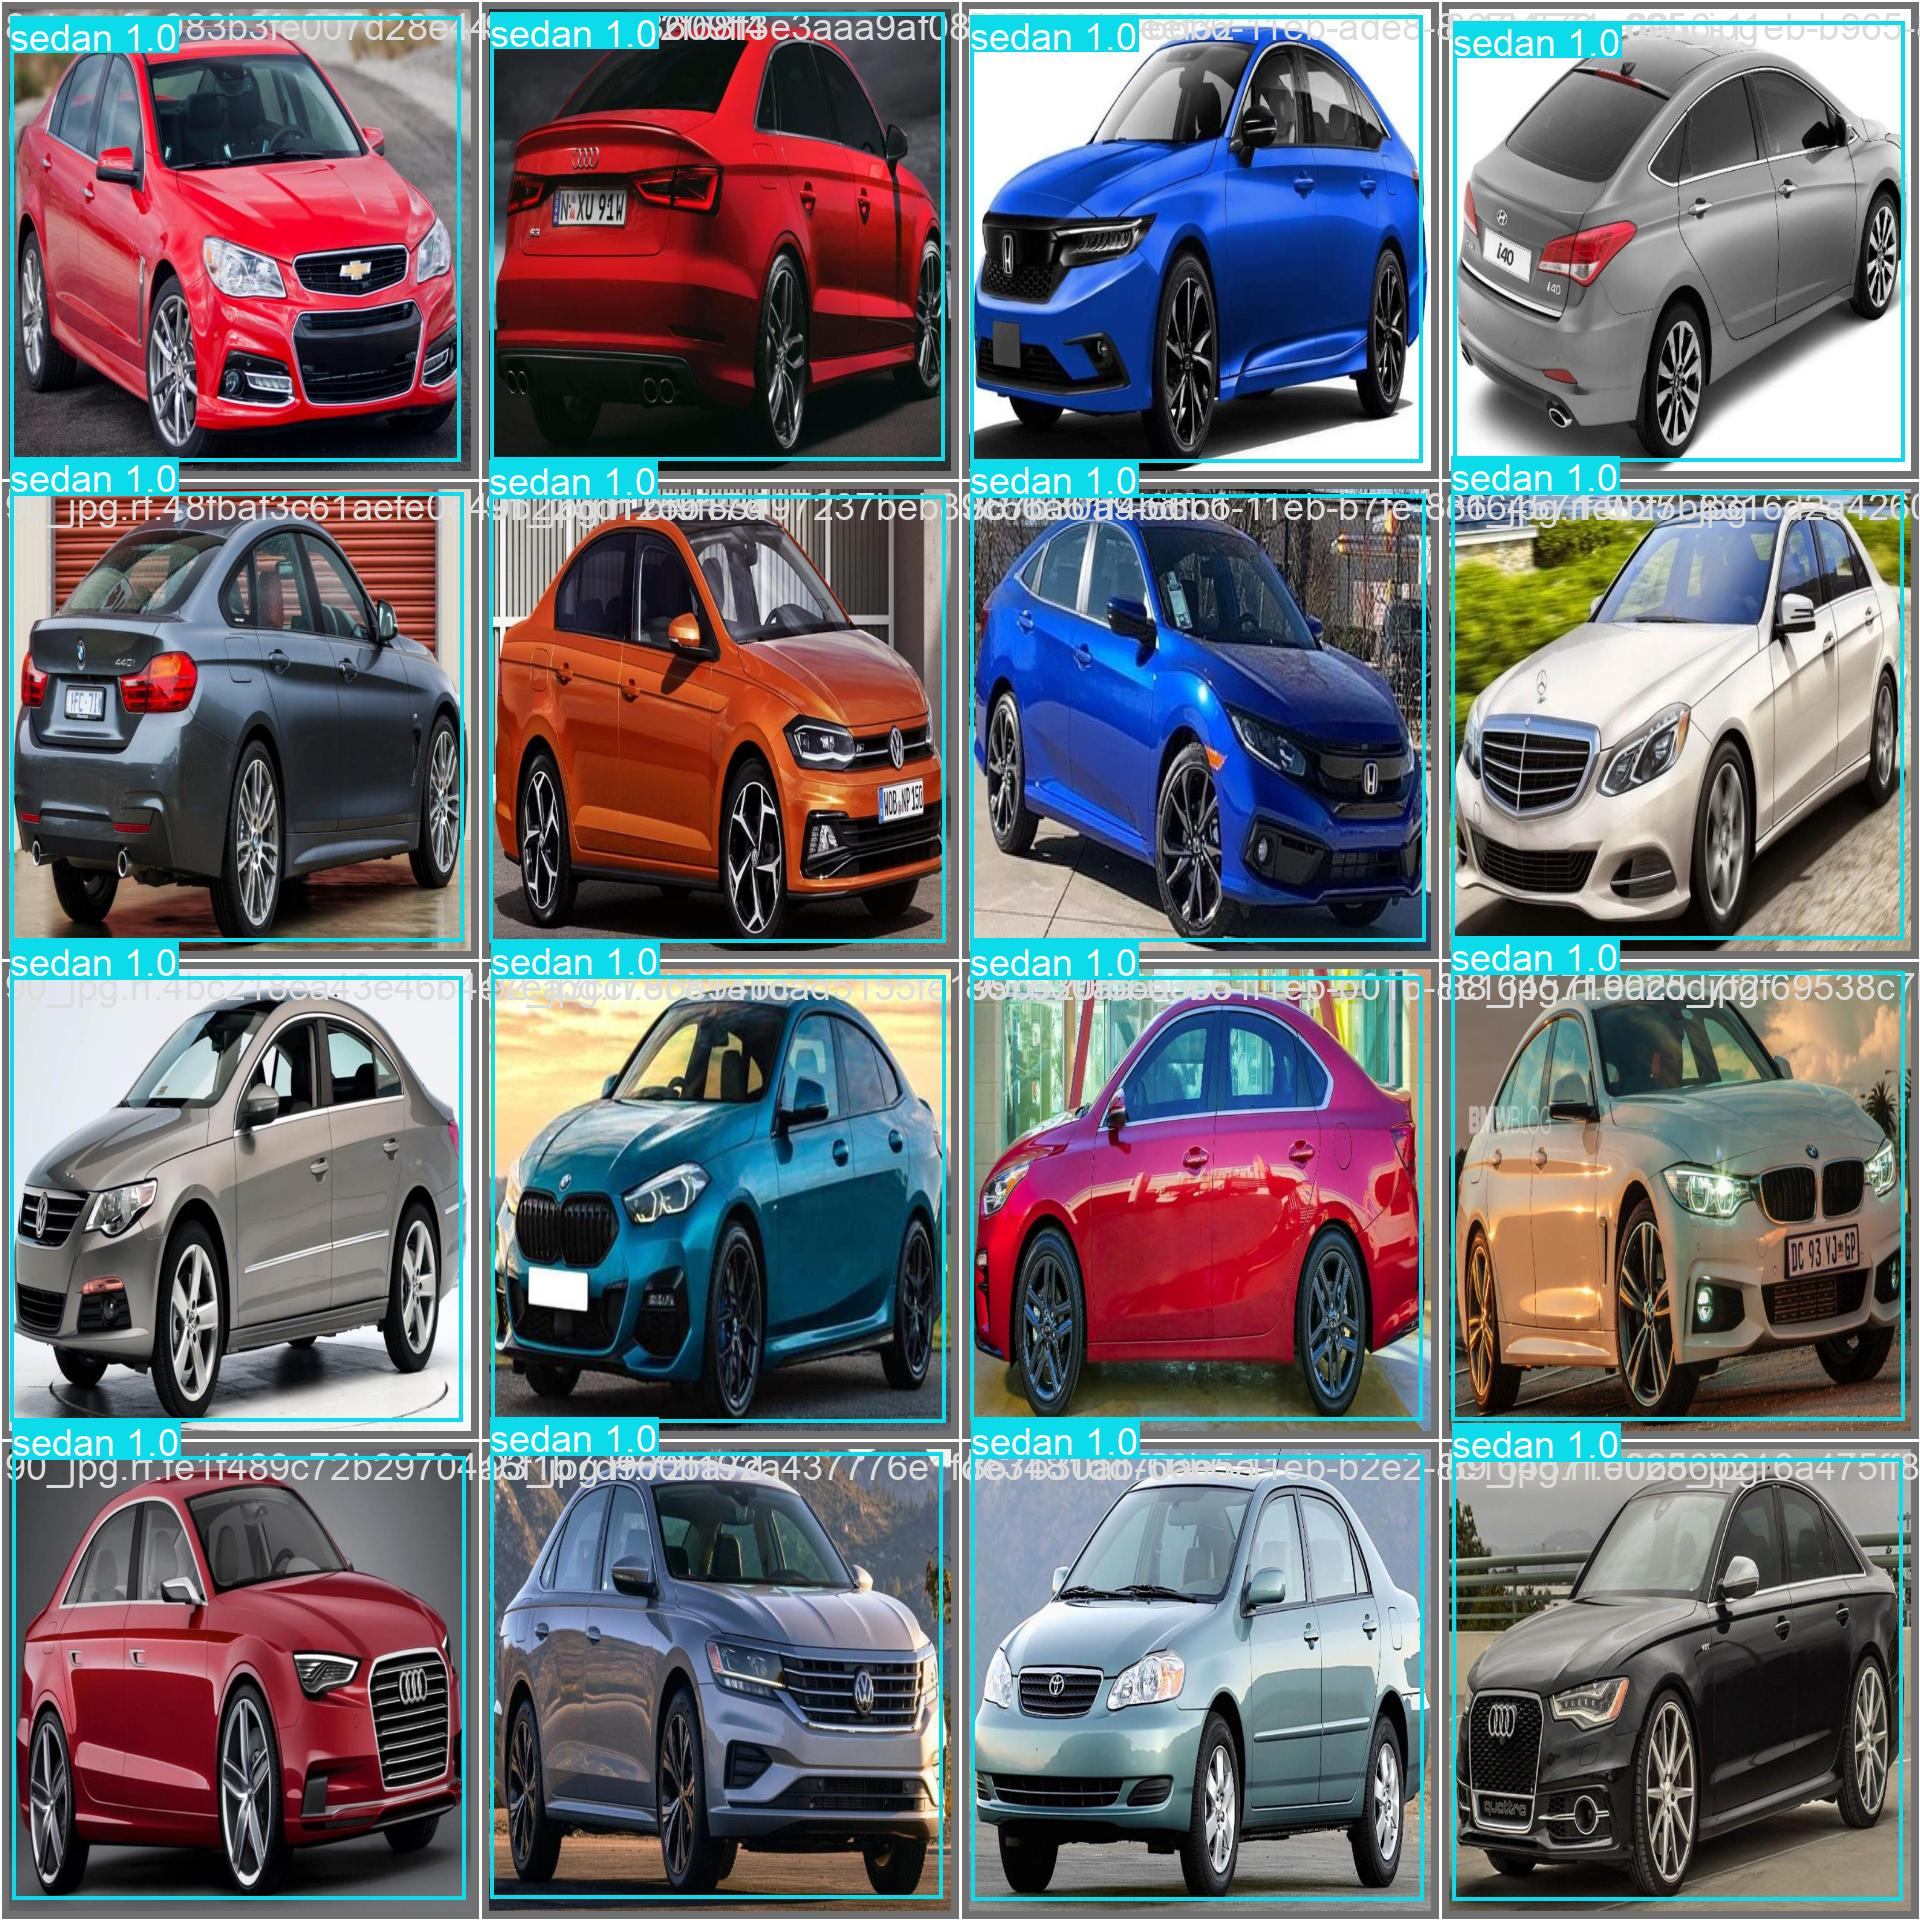

In [ ]:
%cd {HOME}
Image(filename=f'/content/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/datasets/test/images save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ Image Read Error /content/datasets/test/images/image.jpg
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 831, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 555, in predict
    return self.predictor.predict_cli(source=source) if is_cli else self.predictor(source=source, stream=stream)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/predictor.py", line 183, in predict_cli
    for _ in gen:  # sourcery skip: 

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/datasets/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/valid/labels.cache... 410 images, 3 backgrounds, 0 corrupt: 100% 413/413 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 26/26 [00:09<00:00,  2.75it/s]
                   all        413        410       0.98      0.978       0.98      0.956
                 sedan        227        227      0.982      0.982      0.985       0.95
                   suv        183        183      0.978      0.973      0.976      0.962
Speed: 1.4ms preprocess, 14.0ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


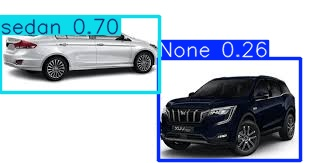

In [ ]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

              # Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

              # Display each image
for image_path in image_paths:
  display(Image(filename=image_path, width=600))
  print("\n")

In [ ]:
!yolo task=detect mode=predict model=/content/best.pt conf=0.25 source=/content/images save=True

Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs

image 1/17 /content/images/WhatsApp Image 2025-01-19 at 15.44.12_282a4f30.jpg: 608x800 1 suv, 46.1ms
image 2/17 /content/images/WhatsApp Image 2025-01-19 at 15.44.12_50095db6.jpg: 448x800 (no detections), 39.3ms
image 3/17 /content/images/WhatsApp Image 2025-01-19 at 15.44.13_6698dde3.jpg: 448x800 1 None, 3 suvs, 15.1ms
image 4/17 /content/images/WhatsApp Image 2025-01-19 at 15.44.13_ba2564f1.jpg: 448x800 1 suv, 15.1ms
image 5/17 /content/images/WhatsApp Image 2025-01-19 at 15.44.13_f608b198.jpg: 800x800 1 None, 23.5ms
image 6/17 /content/images/WhatsApp Image 2025-01-19 at 15.45.42_b922b028.jpg: 512x800 1 sedan, 45.1ms
image 7/17 /content/images/WhatsApp Image 2025-01-19 at 15.45.43_14044bb6.jpg: 416x800 1 sedan, 38.8ms
image 8/17 /content/images/WhatsApp Image 2025-01-19 at 15.45.43_2192b925.jpg: 608x800 1 suv, 18.